In [2]:
import pylab as pl
import pandas as pd
import numpy as np
import os
import datetime as dt
%pylab inline

df = pd.read_csv(os.getenv("PUIDATA") + "/" + '201606-citibike-tripdata.csv')
df.head()

Populating the interactive namespace from numpy and matplotlib


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1470,6/1/2016 00:00:18,6/1/2016 00:24:48,380,W 4 St & 7 Ave S,40.734011,-74.002939,3236,W 42 St & Dyer Ave,40.758985,-73.993800,19859,Subscriber,1972.0,1
1,229,6/1/2016 00:00:20,6/1/2016 00:04:09,3092,Berry St & N 8 St,40.719009,-73.958525,3103,N 11 St & Wythe Ave,40.721533,-73.957824,16233,Subscriber,1967.0,1
2,344,6/1/2016 00:00:21,6/1/2016 00:06:06,449,W 52 St & 9 Ave,40.764618,-73.987895,469,Broadway & W 53 St,40.763441,-73.982681,22397,Subscriber,1989.0,1
3,1120,6/1/2016 00:00:28,6/1/2016 00:19:09,522,E 51 St & Lexington Ave,40.757148,-73.972078,401,Allen St & Rivington St,40.720196,-73.989978,16231,Subscriber,1991.0,1
4,229,6/1/2016 00:00:53,6/1/2016 00:04:42,335,Washington Pl & Broadway,40.729039,-73.994046,285,Broadway & E 14 St,40.734546,-73.990741,15400,Subscriber,1989.0,1


In [5]:
df['time'] = pd.to_datetime(df['starttime'])
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,time
0,1470,6/1/2016 00:00:18,6/1/2016 00:24:48,380,W 4 St & 7 Ave S,40.734011,-74.002939,3236,W 42 St & Dyer Ave,40.758985,-73.993800,19859,Subscriber,1972.0,1,2016-06-01 00:00:18
1,229,6/1/2016 00:00:20,6/1/2016 00:04:09,3092,Berry St & N 8 St,40.719009,-73.958525,3103,N 11 St & Wythe Ave,40.721533,-73.957824,16233,Subscriber,1967.0,1,2016-06-01 00:00:20
2,344,6/1/2016 00:00:21,6/1/2016 00:06:06,449,W 52 St & 9 Ave,40.764618,-73.987895,469,Broadway & W 53 St,40.763441,-73.982681,22397,Subscriber,1989.0,1,2016-06-01 00:00:21
3,1120,6/1/2016 00:00:28,6/1/2016 00:19:09,522,E 51 St & Lexington Ave,40.757148,-73.972078,401,Allen St & Rivington St,40.720196,-73.989978,16231,Subscriber,1991.0,1,2016-06-01 00:00:28
4,229,6/1/2016 00:00:53,6/1/2016 00:04:42,335,Washington Pl & Broadway,40.729039,-73.994046,285,Broadway & E 14 St,40.734546,-73.990741,15400,Subscriber,1989.0,1,2016-06-01 00:00:53


In [21]:
# df_subct = df[df.usertype == 'Subscriber'].groupby(df.time.dt.hour, as_index=False).count()
# df_custct = df[df.usertype == 'Customer'].groupby(df.time.dt.hour, as_index=False).count()
# df_subct.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,time
0,12370,12370,12370,12370,12370,12370,12370,12370,12370,12370,12370,12370,12370,11945,12370,12370
1,6413,6413,6413,6413,6413,6413,6413,6413,6413,6413,6413,6413,6413,6200,6413,6413
2,3809,3809,3809,3809,3809,3809,3809,3809,3809,3809,3809,3809,3809,3621,3809,3809
3,2523,2523,2523,2523,2523,2523,2523,2523,2523,2523,2523,2523,2523,2445,2523,2523
4,2218,2218,2218,2218,2218,2218,2218,2218,2218,2218,2218,2218,2218,2163,2218,2218


AttributeError: 'AxesSubplot' object has no attribute 'set_linewidth'

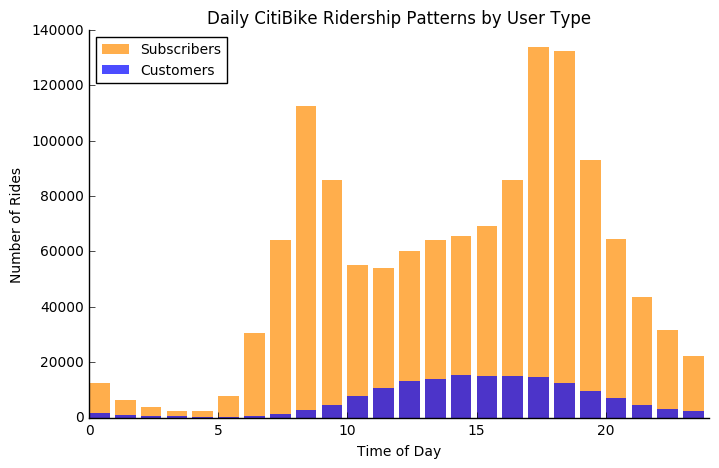

In [77]:
pl.figure(figsize=(8,5))
pl.bar(df_subct.index, df_subct.tripduration, color='DarkOrange', alpha=0.7, label='Subscribers', linewidth=0)
pl.bar(df_custct.index, df_custct.tripduration, color='Blue', alpha=0.7, label='Customers', linewidth=0)
pl.xlabel('Time of Day')
pl.ylabel('Number of Rides')
pl.xlim(0,24)
pl.title('Daily CitiBike Ridership Patterns by User Type')
pl.legend(loc='upper left', fontsize=10)

pl.gca().spines['right'].set_visible(False)
pl.gca().spines['top'].set_visible(False)
pl.gca().yaxis.set_ticks_position('left')
pl.gca().xaxis.set_ticks_position('bottom')
pl.gca().set_linewidth(2) 

#### Figure 1. Total number of NYC CitiBike rides for each hour of the day in June, 2016. Absolute differences in ridership between long-term users ('Subscribers') and short-term users ('Customers') can be seen, as well as a distinct difference in daily ridership patters (i.e. Subscribers relative ridership during commute hours is higher).

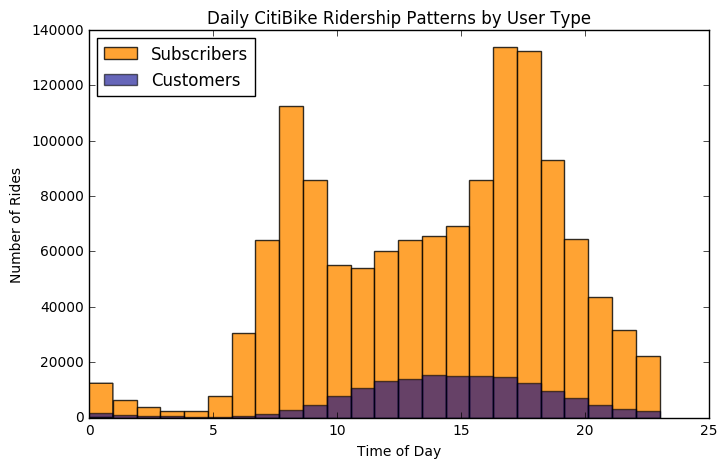

In [56]:
# pl.figure(figsize=(8,5))
# pl.hist(df[df.usertype == 'Subscriber'].time.dt.hour, bins=24, color='DarkOrange', alpha=0.8, label='Subscribers')
# pl.hist(df[df.usertype == 'Customer'].time.dt.hour, bins=24, color='DarkBlue', alpha=0.6, label='Customers')
# pl.xlabel('Time of Day')
# pl.ylabel('Number of Rides')
# pl.title('Daily CitiBike Ridership Patterns by User Type')
# pl.legend(loc='upper left')